In [1]:
import sys
sys.path.append('/home/francisco/hons/HonsProOpen/MLPHonoursExtension/mlp')
sys.path.append('/home/francisco/hons/HonsProOpen/MLPHonoursExtension')
sys.path.append('..')





In [2]:
from copy import deepcopy
from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.layers import * 
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost, MSECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed
import numpy
import logging
from mlp.dataset import *
from base import *

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

train_dp = MACLDataProvider(dset='train', batch_size=100,
                            max_num_batches=-10, randomize=True,name='RLAx', conv_reshape=False)
valid_dp = MACLDataProvider(dset='valid', batch_size=1140,
                            max_num_batches=1, randomize=False,name='RLAx', conv_reshape=False)


test_dp = MACLDataProvider(dset='test', batch_size=1140,
                            max_num_batches=1, randomize=False,name='RLAx', conv_reshape=False)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
rng = numpy.random.RandomState([2015,10,10])

INFO:root:Initialising data providers...


(6840, 45, 125) (6840,)
(6840, 125)
(1140, 45, 125) (1140,)
(1140, 125)
(1140, 45, 125) (1140,)
(1140, 125)


In [4]:
#some hyper-parameters
nhid = 100
learning_rate =0.07
max_epochs = 1000

cost = CECost()    
stats = list()

# test_dp = deepcopy(valid_dp)
train_dp.reset()
valid_dp.reset()
test_dp.reset()

#define the model
model = MLP(cost=cost)
model.add_layer(ComplexAbs(idim=125, odim=125, irange=1.6, rng=rng))
# Every activation function from dft layer produces two values (x,y) for x+iy
#model.add_layer(Sigmoid(idim=125, odim=125, irange=1.6, rng=rng))
# model.add_layer(ComplexAbs(idim=125, odim=125, irange=1.6, rng=rng))
model.add_layer(Sigmoid(idim=125, odim=125, irange=1.6, rng=rng))



model.add_layer(Softmax(idim=125, odim=19, rng=rng))

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs
lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Training started...')
tra, val = optimiser.train(model, train_dp, test_dp)

logger.info('Testing the model on test set:')

tst_costf, tst_accuracyf = optimiser.validate(model,deepcopy(valid_dp) )
logger.info('ACL test set accuracy is %.2f %%, cost (%s) is %.3f'%
            (tst_accuracyf*100., cost.get_name(), tst_costf))

INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 3.164. Accuracy is 5.26%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 3.128. Accuracy is 5.26%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.679. Accuracy is 22.96%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.436. Accuracy is 28.25%
INFO:mlp.optimisers:Epoch 1: Took 0 seconds. Training speed 32386 pps. Validation speed 57050 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 2.248. Accuracy is 37.53%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 2.148. Accuracy is 38.86%
INFO:mlp.optimisers:Epoch 2: Took 0 seconds. Training speed 32386 pps. Validation speed 57050 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 2.003. Accuracy is 40.75%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 1.954. Accuracy is 42.63%
INFO:mlp.optimisers:Epoch 3: Took 0 seconds. Training speed 34005 pps. Validation speed 114100 pps.
INFO:mlp.optim

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

train_dp = MACLDataProvider(dset='train', batch_size=100,
                            max_num_batches=-10, randomize=True,name='RLAx', conv_reshape=True)
valid_dp = MACLDataProvider(dset='valid', batch_size=1140,
                            max_num_batches=1, randomize=False,name='RLAx', conv_reshape=True)


test_dp = MACLDataProvider(dset='test', batch_size=1140,
                            max_num_batches=1, randomize=False,name='RLAx', conv_reshape=True)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
rng = numpy.random.RandomState([2015,10,10])

INFO:root:Initialising data providers...


(6840, 45, 125) (6840,)
(6840, 125)
(1140, 45, 125) (1140,)
(1140, 125)
(1140, 45, 125) (1140,)
(1140, 125)


In [4]:
# reload("mlp/con")
from mlp.convlin import *
#rng = numpy.random.RandomState([2015,10,10])

cost = CECost()
model = MLP(cost=cost)
model.add_layer(ComplexAbs(idim=125, odim=125, irange=1.6, rng=rng))
# model.add_layer(ComplexAbs(idim=125, odim=125, irange=1.6, rng=rng))

model.add_layer(ConvRelu_Opt(1, 1, rng=rng, stride=(1,1)))
#model.add_layer(ConvRelu_Opt(5, 5, rng=rng, stride=(1,1), image_shape=(122,)))
# model.add_layer(ConvMaxPool2D(5, (100,5, 24,24)))
# model.add_layer(ConvLinear_Opt(5, 10, rng=rng, image_shape=(12, 12) , kernel_shape=(5,5)))
# model.add_layer(ConvMaxPool2D(10, (100,10, 8,8), pool_shape=(2,2)))
# sigmoid 
model.add_layer(Sigmoid(idim=122*1, odim=122*1, rng=rng))

model.add_layer(Softmax(idim=122*1, odim=19, rng=rng))
# for sigmoid 0.1 is good for linear 0.005 and 0.1 is so so bigger not so good. ReLu : 0.1
lr_scheduler = LearningRateFixed(learning_rate=0.01, max_epochs=116)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)
val, tra = optimiser.train(model, train_dp, test_dp)

tst_costf, tst_accuracyf = optimiser.validate(model,deepcopy(valid_dp) )
logger.info('ACL test set accuracy is %.2f %%, cost (%s) is %.3f'%
            (tst_accuracyf*100., cost.get_name(), tst_costf))

INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.995. Accuracy is 6.40%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 3.013. Accuracy is 7.28%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.756. Accuracy is 20.15%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.599. Accuracy is 30.61%
INFO:mlp.optimisers:Epoch 1: Took 0 seconds. Training speed 22670 pps. Validation speed 57050 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 2.398. Accuracy is 44.06%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 2.337. Accuracy is 34.21%
INFO:mlp.optimisers:Epoch 2: Took 0 seconds. Training speed 21939 pps. Validation speed 57050 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 2.158. Accuracy is 49.96%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 2.143. Accuracy is 38.68%
INFO:mlp.optimisers:Epoch 3: Took 0 seconds. Training speed 21939 pps. Validation speed 57050 pps.
INFO:mlp.optimisers:Epoch 4: Training cost (c

In [25]:
valid_dp.reset()
evaluation =  optimiser.validate2(model,deepcopy(valid_dp) )

In [6]:
evaluation
ypred = np.argmax(evaluation[2], axis=-1)
meanll = np.mean(np.log(np.max(evaluation[2],axis=-1) ))


In [7]:
ypred, len(ypred[0])

(array([[17, 14, 17, ...,  0,  2,  0]]), 1140)

In [8]:
meanll

-0.51929286074726255

In [9]:
import matplotlib.pyplot as plt
%matplotlib qt
from sklearn.metrics import confusion_matrix
true = deepcopy(valid_dp).t
print max(true), max(ypred)
cnf = confusion_matrix(true, ypred[0])
plt.matshow(cnf)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()


18 [17 14 17 ...,  0  2  0]


In [10]:
import cPickle as p


d = {"confusion": cnf, "meanll": meanll, "accs":(val, tra), "test_acc": tst_accuracyf}

with open("fullconevaluation_fft_final", "wb") as a:
    p.dump(d, a)

In [5]:
W = model.layers[0].Wr + model.layers[0].Wi *1.0j
import cPickle as p

#W = model.layers[1].W
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from scipy.linalg import dft
from bokeh.plotting import ColumnDataSource


with open("weight_mat_full.pkl", "wb") as dd:
    p.dump(W, dd)


output_notebook()
W

Loading BokehJS ...

array([[ 1.00373764+0.j        ,  0.99419004-0.00327048j,
         1.00119070+0.00108147j, ...,  0.99191856-0.01313046j,
         0.99242813-0.0129057j ,  1.00073157-0.00268778j],
       [ 1.00286967+0.j        ,  0.99020092-0.05131586j,
         0.99304636-0.09829576j, ...,  0.98335992+0.13974709j,
         0.98644161+0.08457412j,  0.99649816+0.04866696j],
       [ 1.00262859+0.j        ,  0.98369282-0.0998783j ,
         0.97509664-0.19652395j, ...,  0.94723958+0.29906907j,
         0.96956193+0.19297362j,  0.99099469+0.10134266j],
       ..., 
       [ 0.99034420+0.j        ,  0.98619594+0.16071571j,
         0.95190313+0.29973829j, ...,  0.89828070-0.41491191j,
         0.94234806-0.2794382j ,  0.97647276-0.13998885j],
       [ 0.98883094+0.j        ,  0.99612598+0.10920413j,
         0.97736076+0.20380445j, ...,  0.94550150-0.27591755j,
         0.96444297-0.18017442j,  0.97696036-0.09217297j],
       [ 0.99040701+0.j        ,  1.00039111+0.05837457j,
         0.99844907+0.1019132

In [39]:
from bokeh.palettes import (Blues9, BrBG9, BuGn9, BuPu9, GnBu9, Greens9,
                            Greys9, OrRd9, Oranges9, PRGn9, PiYG9, PuBu9,
                            PuBuGn9, PuOr9, PuRd9, Purples9, RdBu9, RdGy9,
                            RdPu9, RdYlBu9, RdYlGn9, Reds9, Spectral9, YlGn9,
                            YlGnBu9, YlOrBr9, YlOrRd9)

r = [ '#e31a1c', '#fd8d3c']

print YlOrRd9
#W = dft(125)
W2 = dft(125)
print W2.all() == W2.all()
Wr = np.imag( np.conj(W.T).dot(W2) )
Wr = np.imag(W / W2 )
p =figure(x_range=(0, 124), y_range=(0, 124))
e= np.ones((125,125))
#print e ==Wr
#print Wr -e
p.image(image=[np.identity(125)], x=0, y=0, dw=124, dh=124, palette=YlOrRd9)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_tick_line_color = None
p.axis[0].ticker.num_minor_ticks = 0
p.axis[1].ticker.num_minor_ticks = 0
p.outline_line_color = "white"
p.xaxis.axis_line_color = "white"
p.yaxis.axis_line_color = "white"
show(p)
#print np.diag(Wr)

['#800026', '#bd0026', '#e31a1c', '#fc4e2a', '#fd8d3c', '#feb24c', '#fed976', '#ffeda0', '#ffffcc']
True


In [40]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
W2 = dft(125)

plt.matshow(numpy.imag(W/W2), cmap = cm.Greys_r)
plt.xlabel("frequency vectors")
plt.ylabel("time components")
plt.show()



In [8]:
plt.matshow(numpy.real(W2) - np.real(W), cmap = cm.Greys_r)
plt.xlabel("frequency vectors")
plt.ylabel("time components")
plt.colorbar()
plt.show()


In [9]:
plt.matshow(numpy.imag(W2 - W), cmap = cm.Greys_r)
plt.xlabel("frequency vectors")
plt.ylabel("time components")
plt.colorbar()
plt.show()


In [11]:
plt.matshow(numpy.imag(np.conj(W.T).dot(W) ), cmap = cm.Greys_r)
plt.xlabel("frequency vectors")
plt.ylabel("time components")
plt.colorbar()

plt.show()


In [10]:
plt.matshow(numpy.real(np.conj(W.T).dot(W) ), cmap = cm.Greys_r)
plt.xlabel("frequency vectors")
plt.ylabel("time components")
plt.colorbar()

plt.show()

In [12]:
plt.matshow(numpy.real(W), cmap = cm.Greys_r)
plt.xlabel("frequency vectors")
plt.ylabel("time components")
plt.colorbar()

plt.show()

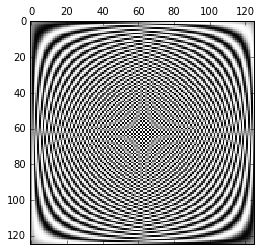

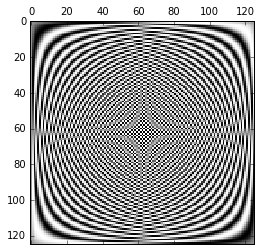

In [42]:
plt.matshow(np.imag(W), cmap = cm.Greys_r)
plt.matshow(np.imag(W2), cmap = cm.Greys_r)

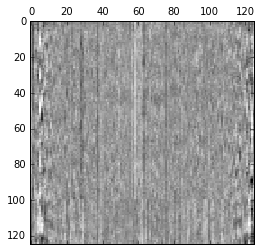

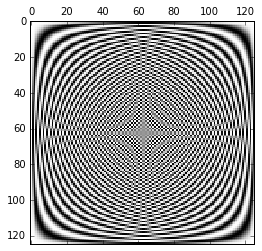

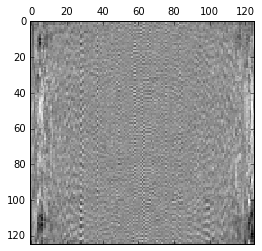

In [43]:
plt.matshow(np.real(W) - np.real(W2), cmap = cm.Greys_r)
plt.matshow(np.real(W2), cmap = cm.Greys_r)
plt.matshow(np.real(W/W2), cmap = cm.Greys_r)


In [14]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt2015Runtime
from matplotlib import cm
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

x, y = np.meshgrid(range(125), range(125))

Z = np.imag(W).T
# ax.scatter(x, y, Z)
ax.plot_wireframe(x, y, Z, rstride=8, cstride=8, alpha=0.3, cmap=cm.coolwarm)
#cset = ax.contour(x, y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(x, y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
cset = ax.contour(x, y, Z, zdir='y', offset=135, cmap=cm.coolwarm)

ax.set_xlabel('frequency vectors')
ax.set_xlim(0, 120)
ax.set_ylabel('time components')
ax.set_ylim(0, 120)
#ax.set_zlabel('Z')
#ax.set_zlim(-1,-1)

plt.show()